In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [16]:
class KMeans(object):
    def __init__(self, k):
        self.k = k 
    
    def fit(self, X, epoch, initial_centroid_index=None):
        '''
        initial_centroid_index:初始化的中心点
        centroid: 聚类中心
        centers_idx: 各样本点所属的簇的中心点索引
        clusters：各簇的样本点
        '''
        m, n = X.shape
        k = self.k
        if not initial_centroid_index:
            initial_centroid_index = np.random.choice(range(m), k)
        centroid = X[initial_centroid_index, :].copy()
        centers_idx = np.empty(m)
        
        plt.ion()
        for _ in range(epoch):
            clusters = [[] for i in range(k)]
            for i in range(m):
                dist = [self.get_dist(X[i], centroid[j]) for j in range(k)]
                centers_idx[i] = np.argmin(dist)
                clusters[int(centers_idx[i])].append(X[i, :])
                
            self.plot_converge(X, centers_idx, initial_centroid_index)
            centroid_ = [np.mean(clusters[i]) for i in range(k)]
            if centroid == centroid_:
                break
            else:
                centroid =centroid_

        plt.ioff()
        plt.show()
        return clusters, centroid, centers_idx

    def get_dist(self, a, b):
        return np.sum((a - b)**2)

    def plot_converge(self, X, idx, initial_idx):
        plt.cla()  # 清除原有图像

        plt.title("k-meas converge process")
        plt.xlabel('density')
        plt.ylabel('sugar content')

        plt.scatter(X[:, 0], X[:, 1], c='lightcoral')
        # 标记初始化中心点
        plt.scatter(X[initial_idx, 0], X[initial_idx, 1], label='initial center', c='k')

        # 画出每个簇的凸包
        for i in range(self.k):
            X_i = X[idx == i]

            # 获取当前簇的凸包索引
            hull = ConvexHull(X_i).vertices.tolist()
            hull.append(hull[0])
            plt.plot(X_i[hull, 0], X_i[hull, 1], 'c--')

        plt.legend()
        plt.pause(0.5)         

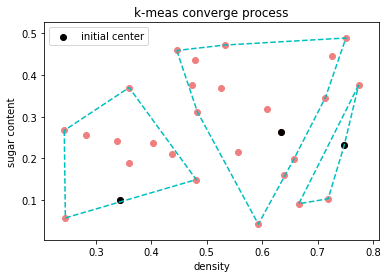

/home/lyf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


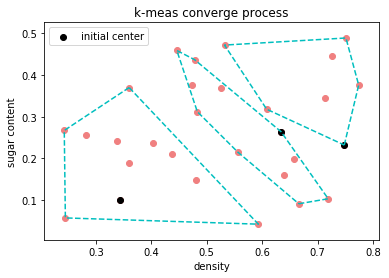

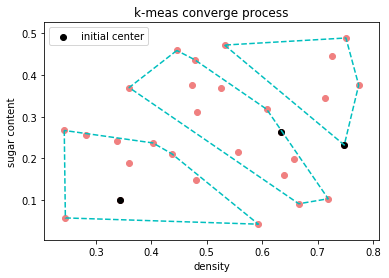

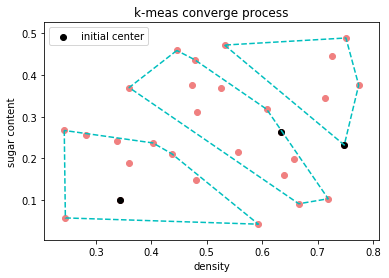

In [17]:
data = pd.read_csv("watermelon4.csv")
model = KMeans(3)
a,b,c = model.fit(np.array(data),10)

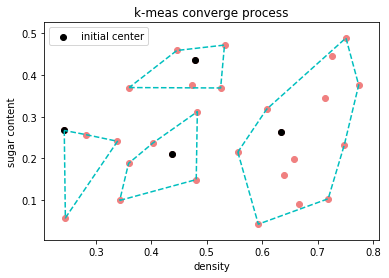

/home/lyf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


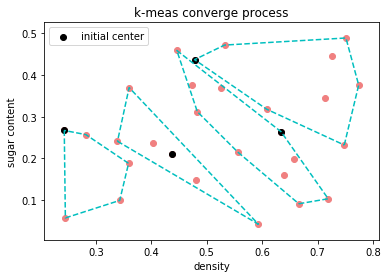

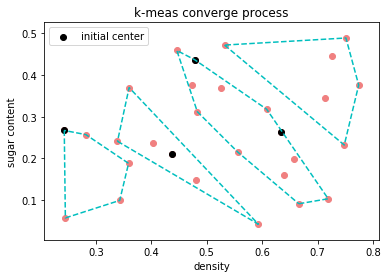

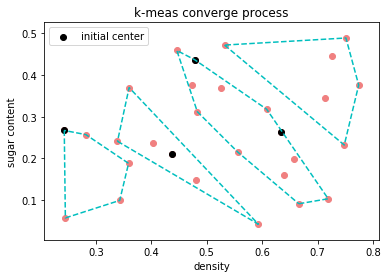

In [19]:
model = KMeans(4)
a,b,c = model.fit(np.array(data),10)